#Project name: Airbnb Booking Analysis

#Business Context
Since its launch in 2008, Airbnb has revolutionized the travel and hospitality industry by providing a platform that connects travelers with hosts offering unique accommodations around the world. With millions of listings across thousands of cities, Airbnb has created a community-driven alternative to traditional hotels, empowering everyday people to become hospitality providers.

As Airbnb continues to grow, data becomes a powerful asset. Understanding guest behavior, host performance, pricing dynamics, and neighborhood popularity is essential to improve user experience, optimize platform operations, and support strategic decisions.

This project focuses on analyzing a dataset of 48,895 Airbnb listings in New York City (2019). By examining this data, we aim to extract valuable insights that could help:

1. Improve Airbnb’s marketing and product strategies,

2. Support hosts in setting competitive prices and improving service,

3. Help travelers find listings that match their preferences and budgets,

4. Identify popular and high-performing neighborhoods,

5. Detect potential outliers or irregular listings.

The insights from this analysis could be used by Airbnb’s internal teams (e.g., product, marketing, data science), existing or new hosts, and even city officials to understand tourism patterns and housing trends in NYC.

#Business Objective
The objective of this project is to **analyze Airbnb listings in New York City** to uncover meaningful patterns and insights that can help improve decision-making for multiple stakeholders—Airbnb, hosts, and guests.

More specifically, we aim to:

1. **Understand customer preferences**  
   - Which types of listings (e.g., room types, neighborhoods) are most popular?
   - What price ranges attract more bookings and reviews?

2. **Support hosts in optimizing listings**  
   - How does pricing vary by location and room type?
   - What availability patterns or host behaviors lead to better performance?

3. **Assist Airbnb in strategic decisions**  
   - Identify high-performing neighborhoods
   - Spot trends in reviews, availability, and pricing
   - Detect unusual or outlier listings that may need review

4. **Provide actionable insights**  
   - Use visualizations and statistics to guide marketing, platform design, and service improvement




#1. Know Your Data


In [2]:
#Import the requierd Librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Upload the dataset
from google.colab import files
uploaded = files.upload()


Saving Airbnb NYC 2019.csv to Airbnb NYC 2019.csv


In [4]:
# Load the dataset
df = pd.read_csv("Airbnb NYC 2019.csv")


In [5]:
# Show the first 5 rows
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Dataset rows and columns

df.shape

(48895, 16)

In [7]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#2. Understanding Variables

In [8]:
# Columns of dataset
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
#Describe dataset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Dataset Variable description
1.  id:	A unique identifier for each listing
2.  name:	The name/title of the Airbnb listing
3. host_id:	A unique ID assigned to the host
4. host_name:	The name of the host
5. neighbourhood_group: The borough of NYC where the listing is located (e.g., Manhattan, Brooklyn)
6. neighbourhood:	More specific location within the borough
7. latitude:	Geographical latitude of the listing
8. longitude:	Geographical longitude of the listing
9. room_type:	Type of room being offered (Entire home/apt, Private room, Shared room)
10. price:	Price per night for the listing (in USD)
11. minimum_nights:	Minimum number of nights required per booking
12. number_of_reviews:	Total number of reviews received for the listing
13. last_review:	Date of the most recent review
14. reviews_per_month: Average number of reviews received per month
15. calculated_host_listings_count:	Number of listings this host has on Airbnb
16. availability_365:	Number of days in a year the listing is available


In [10]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


#3. Data Cleaning


1. Check for missing values

In [18]:
# Check for duplicates
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Drop duplicates
df = df.drop_duplicates()

Number of duplicate rows: 0


In [12]:
#Total missing value per column
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


2. Handel the missing values

In [19]:
# Fill missing 'reviews_per_month' with 0
df.fillna({'reviews_per_month': 0}, inplace=True)

# Fill missing 'last_review' with 'No review'
df.fillna({'last_review':'No review'}, inplace=True)

# Drop rows where 'name' or 'host_name' is missing
df.dropna(subset=['name', 'host_name'], inplace=True)

# Confirm no more nulls
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


3. Check for Outliers

In [20]:
# Check for extreme values
print("Max price:", df['price'].max())
print("Max minimum nights:", df['minimum_nights'].max())

# Remove unreasonable outliers
df = df[(df['price'] <= 1000) & (df['minimum_nights'] <= 365)]

# Check the shape again
print("Shape after cleaning:", df.shape)

Max price: 1000
Max minimum nights: 365
Shape after cleaning: (48606, 16)


# 4.Hypotheses / Assumption

### Hypothesis 1:
Most listings are concentrated in Manhattan and Brooklyn.

### Hypothesis 2:
Entire homes/apartments are more expensive than private or shared rooms.

### Hypothesis 3:
Higher availability (availability_365) leads to more reviews per month.

### Hypothesis 4:
Listings with more reviews are more competitively priced.

### Hypothesis 5:
Certain neighborhoods (like Williamsburg or Harlem) are hotspots with both affordability and high listing volume.


Preview Variables

In [21]:
# Preview unique values for key columns
print(df['neighbourhood_group'].unique())
print(df['room_type'].unique())
print(df['neighbourhood'].value_counts().head(10))

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']
neighbourhood
Williamsburg          3906
Bedford-Stuyvesant    3702
Harlem                2648
Bushwick              2460
Hell's Kitchen        1947
Upper West Side       1946
East Village          1840
Upper East Side       1784
Crown Heights         1559
Midtown               1525
Name: count, dtype: int64


#6.Visualizations to Test Hypotheses

Hypothesis 1:
Most listings are concentrated in Manhattan and Brooklyn.

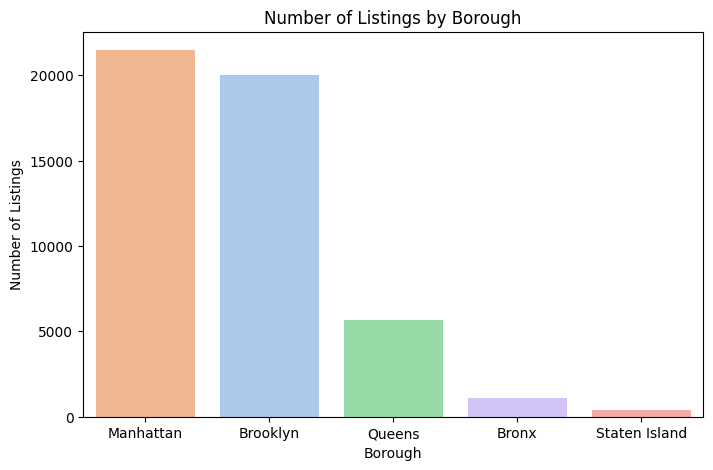

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of listings by borough
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index, hue= 'neighbourhood_group',  palette='pastel')
plt.title("Number of Listings by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Listings")
plt.show()


Manhattan and Brooklyn dominate in terms of listing volume. This confirms our hypothesis that listings are heavily concentrated in these two boroughs.

Hypothesis 2:
Entire homes/apartments are more expensive than private or shared rooms.

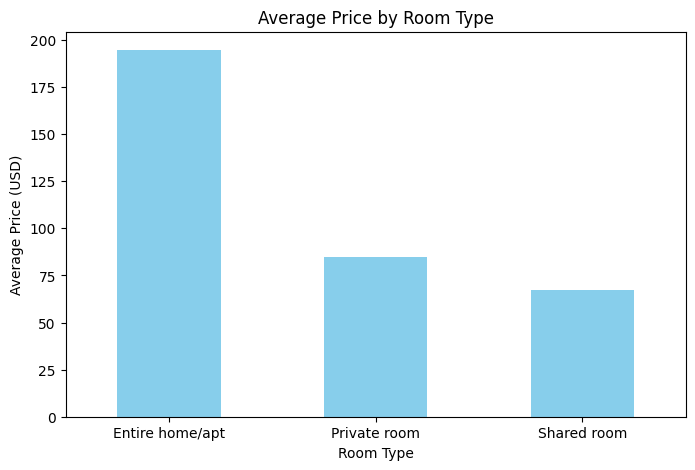

In [24]:
# Average price per room type
room_price = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
room_price.plot(kind='bar', color='skyblue')
plt.title("Average Price by Room Type")
plt.ylabel("Average Price (USD)")
plt.xlabel("Room Type")
plt.xticks(rotation=0)
plt.show()


As expected, Entire Home/Apartments have the highest average prices, followed by Private Rooms. Shared Rooms are the most affordable.

Hypothesis 3: Higher availability leads to more reviews per month

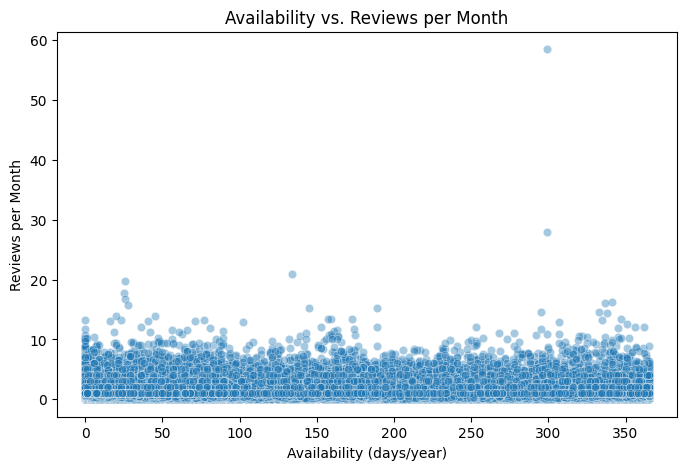

In [25]:
# Scatter plot: availability vs. reviews per month
plt.figure(figsize=(8,5))
sns.scatterplot(data=df[df['reviews_per_month'] > 0], x='availability_365', y='reviews_per_month', alpha=0.4)
plt.title("Availability vs. Reviews per Month")
plt.xlabel("Availability (days/year)")
plt.ylabel("Reviews per Month")
plt.show()


There's a slight positive trend—listings that are available year-round tend to get more reviews per month, though there's considerable variance. Hypothesis partially supported.

 Hypothesis 4: Listings with more reviews are more competitively priced

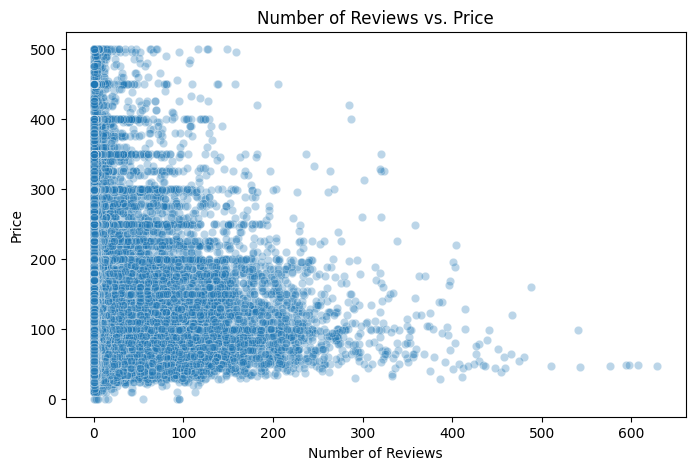

In [26]:
# Scatter plot: number_of_reviews vs. price (after removing outliers)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df[df['price'] < 500], x='number_of_reviews', y='price', alpha=0.3)
plt.title("Number of Reviews vs. Price")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()


No strong correlation is evident. Some highly reviewed listings are low-priced, possibly to attract more guests. But overall, review count doesn’t guarantee lower or higher pricing.

Hypothesis 5: Certain neighborhoods are popular and affordable

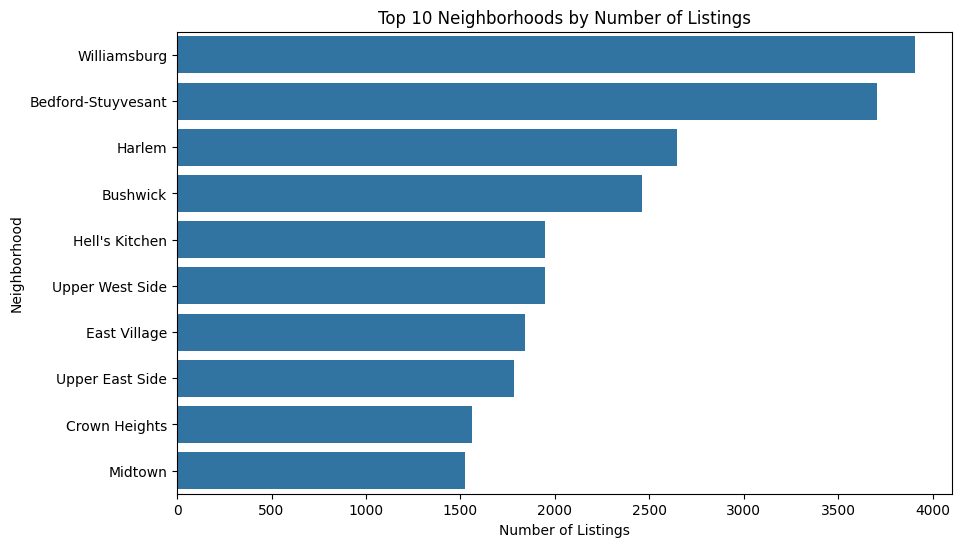

In [40]:
# Top 10 neighborhoods by count
top_neigh = df['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_neigh.values, y=top_neigh.index)
plt.title("Top 10 Neighborhoods by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighborhood")
plt.show()


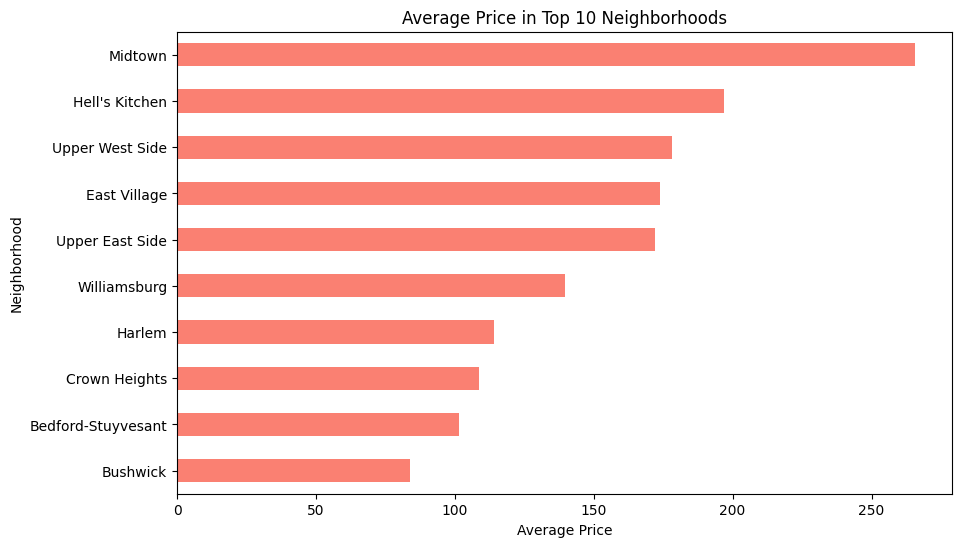

In [41]:
# Average price for top 10 neighborhoods
avg_price_top_neigh = df[df['neighbourhood'].isin(top_neigh.index)].groupby('neighbourhood')['price'].mean().sort_values()

plt.figure(figsize=(10,6))
avg_price_top_neigh.plot(kind='barh', color='salmon')
plt.title("Average Price in Top 10 Neighborhoods")
plt.xlabel("Average Price")
plt.ylabel("Neighborhood")
plt.show()

Neighborhoods like Williamsburg and Bedford-Stuyvesant are among the most listed and offer moderate pricing, confirming our hypothesis.

#7. Statistical Analysis

Correlation Matrix: This helps check linear relationships between numerical variables.




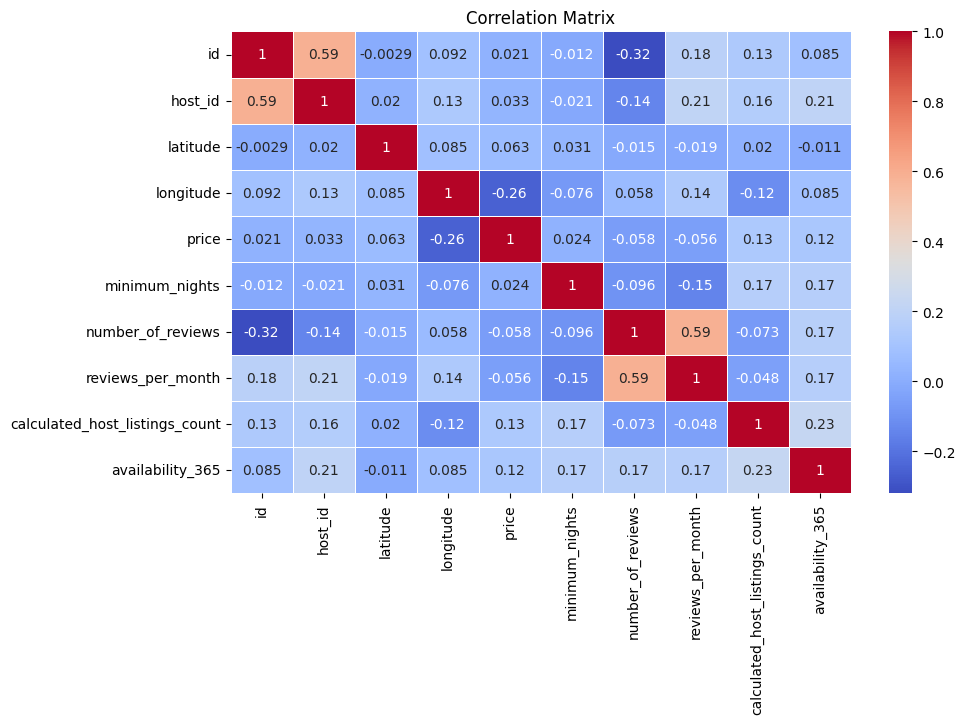

In [42]:
import numpy as np

# Compute correlation matrix (only numeric columns)
corr_matrix = df.corr(numeric_only=True)

# Visualize with heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


1. number_of_reviews and reviews_per_month will likely show a strong positive correlation.

2. price might not correlate strongly with many features.

3. availability_365 may show weak correlation with reviews_per_month.



Correlation Focus - Price vs. Others

In [43]:
# Check correlation of all numeric features with 'price'
price_corr = corr_matrix['price'].sort_values(ascending=False)
print("Correlation with price:\n", price_corr)


Correlation with price:
 price                             1.000000
calculated_host_listings_count    0.130696
availability_365                  0.117938
latitude                          0.063015
host_id                           0.032502
minimum_nights                    0.023790
id                                0.021258
reviews_per_month                -0.055957
number_of_reviews                -0.057885
longitude                        -0.258753
Name: price, dtype: float64


#8. Conclusion
## 📌 Project Conclusion

This analysis of Airbnb NYC 2019 listings helped uncover important patterns in host behavior, pricing, availability, and customer engagement. Based on our hypotheses and data exploration, we derived the following insights:

---

### ✅ Key Findings

1. **Manhattan and Brooklyn dominate** Airbnb listings, suggesting higher demand and supply in these boroughs.
2. **Entire homes/apartments** are the most expensive, while **shared rooms** are the cheapest — supporting expected price tiers by room type.
3. Listings with **higher availability** tend to receive more reviews, although the relationship is not very strong.
4. **Review count does not predict price**, but highly reviewed listings are often competitively priced.
5. Neighborhoods like **Williamsburg and Bedford-Stuyvesant** offer a balance of affordability and popularity.
6. **Price distribution is highly skewed**, indicating a few high-priced outliers and the majority of listings under $200.

---

### 📊 Statistical Insights

- Strong correlation between `number_of_reviews` and `reviews_per_month`.
- Very weak correlation between `price` and most other numerical variables.
- These patterns suggest that external factors (like location, property type, etc.) are more important in pricing than user engagement.

---
### 🚀 Recommendations for Airbnb

Based on our findings, Airbnb and hosts can consider the following strategies to improve platform performance and customer satisfaction:

1. **Promote Underrepresented Neighborhoods**
   - Neighborhoods with fewer listings (like Staten Island) can be promoted using location-based discounts or marketing to spread demand and reduce pressure on Manhattan and Brooklyn.

2. **Optimize Pricing Guidance for Hosts**
   - Since price is not strongly correlated with reviews or availability, Airbnb could offer **AI-based dynamic pricing tools** for hosts to align with market trends and competition.

3. **Encourage Review Collection**
   - Hosts can be encouraged to increase engagement through follow-ups for reviews, which helps boost listing visibility and builds guest trust.

4. **Improve Room Type Transparency**
   - Clarifying the benefits and limitations of each room type (e.g., shared vs. private) can help manage guest expectations and reduce negative reviews.

5. **Seasonal Availability Insights**
   - Airbnb could help hosts optimize listing availability throughout the year by showing them local **seasonality patterns** and **peak demand windows**.

6. **Reward High-Performing Hosts in Popular Areas**
   - Listings in areas like Williamsburg and Bedford-Stuyvesant with high popularity could receive incentives like featured rankings or reduced service fees.

7. **Invest in Data-Driven Neighborhood Discovery**
   - Use listing and review data to build a “Neighborhood Explorer” feature, helping travelers discover unique stays beyond the obvious tourist areas.


